# DSBA-6520 - Project II Deliverable
Nicholas Occhipinti<br>
[https://github.com/nick-occ/dsba-6520-project](https://github.com/nick-occ/dsba-6520-project)

### Dataset & Business Use Case

<p>A project is funded by the NYPD to analyze data from NYC Open Data, which contains both NYPD historic complaint data and NYPD complaint data for 2021. The data includes felony, misdemeanor and violation crimes that have been reported by the NYPD. Each record in this dataset is a complaint that has occurred between 2006 to 2021. The dataset is large, containing over 7 million records. There are 35 features in the dataset containing information about the type of complaint/offense, the level of offense (felony, misdemeanor, etc), the police jurisdiction, the location of the complaint/offense such as latitude/longitude and transit district and station names if applicable. </p>

<p>
For the purposes of the analysis the data will be filtered by dates ranging between 2019 and 2021, and by the more serious types of offenses, that being felonies.  The project scope is only concerned with the NYPD, so other outside entities such as Transit Police will also be excluded.  This will reduce the dataset from 7.4 million complaints to just under 270,000 records. The complaints occurred in 77 precincts within the 5 boroughs of New York City. The complaints in the datasets represent 65 categories that are more general classifications of offenses that can further be broken down into 369 more specific classifications.
</p>

<p>
The business use case is a Crime Analyst working for New York City that has been tasked to work on a project identifying patterns of recurring crime around New York City. Since New York City has such a large population of people and a large area for police to patrol, it is important to spot trends of high crime locations to better allocate police resources. Historical data can help tell a story about how areas of New York City have changed over time and the analyst can identify if these areas are seeing an increase or decrease of crime. The main goal of this project is to develop results that will aid the NYPD leadership to make better decisions and develop actionable items to help reduce crime. Some examples of improvements that this project could lead to is knowing where to increase the police presence in different areas, better communication between NYPD and communities about emerging crime patterns and identifying where to allocate funds towards technology such as adding more security cameras.
</p>

<p>
An additional use case of this project is studying how crime has changed during the COVID-19 pandemic. This was also one of the factors for the chosen date range of the data being from 2019 to 2021.  This represents three different periods: pre-pandemic (2019), pandemic (2020) and vaccine/return to normal period (2021).  The objective is that by analyzing these time periods, conclusions can be derived about if certain types of offenses are higher or lower than normal which could be a result of different factors during the pandemic such as restaurants\public places being closed, reduction of tourists and people being quarantined in their home.
</p>


### Graph Data Model Revisions

One revision made to the data model, was removing the **ComplaintDate** node where the data being loaded is already aggregated by Month-Year.  In place of that node type a **Complaint** node was created to hold all the complaint related properties.  The reasoning for this was that the aggregation could be done through Cypher queries after the data is loaded, and by not aggregating the data initially, additional properties of the complaint can be captured.  The second change was removing the **LocationName** node.  Further exploratory analysis of the data showed that most of the data was not populated for these properties.  There are two categories of offenses, one that is more general and the other that is more granular.  The nodes are grouped together with an **Offense** label since they are related but also created under additional labels separating them into a **SpecificOffense** and a **GeneralOffense**.  For the **PrecinctName** node additional spatial data was imported from https://data.cityofnewyork.us/Public-Safety/Police-Precincts/78dh-3ptz in order to capture the area each precinct covers.  This allows the complaint counts used in the Cypher queries to be normalized.  As a result, an **area** property was added to the **PrecinctName** node.  Lastly, the properties were renamed to make them more meaningful since in the original source of the data, some of the field names were not clear without consulting the data dictionary.
<br><br>
The data model now contains 5 node types, **Complaint**, **PrecinctName**, **Location**, **GeneralOffense** and **SpecificOffense**. The **Complaint** node uses the
“complaint_date” property which is when the complaint was first reported and uses the "complaint_id" property for the constraint to define uniqueness. The dates are a key to determining how complaints have changed over time. The **PrecinctName** node is the precinct where the complaint was reported and is represented by the “precinct” property. The relationship between **Complaint** and **PrecinctName** is a directional relationship where the precinct reports a complaint. The **Location** node is where the complaints occur and are spatially created as points through the latitude and longitude properties which represent the smallest level of granularity in this dataset.  There is a directional relationship where complaints are located at locations.

There are two types of offenses those that are more general and another category of more specific offenses which are broken up into two nodes, **GeneralOffense** and **SpecificOffense** respectively. Based on the requirements of the analysis the user could just work with the **GeneralOffense** node to get a general name of the offense, but if more information is needed, the **SpecificOffense** node offers that extra level of detail.  Each offense node has an id number which is the offense code, and a description of what that offense is.  There is a directional relationship between complaints where the related complaints contain details of an offense that was committed, and the general offense can get the classification of the specific offense category.


**<u>Updated Graph Data Model<u/>**

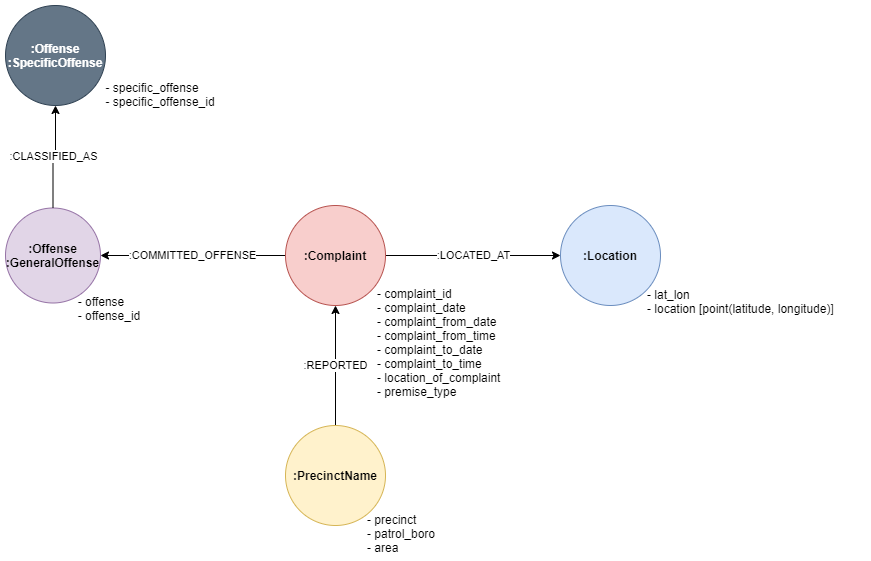

**<u>Original Graph Data Model</u>**

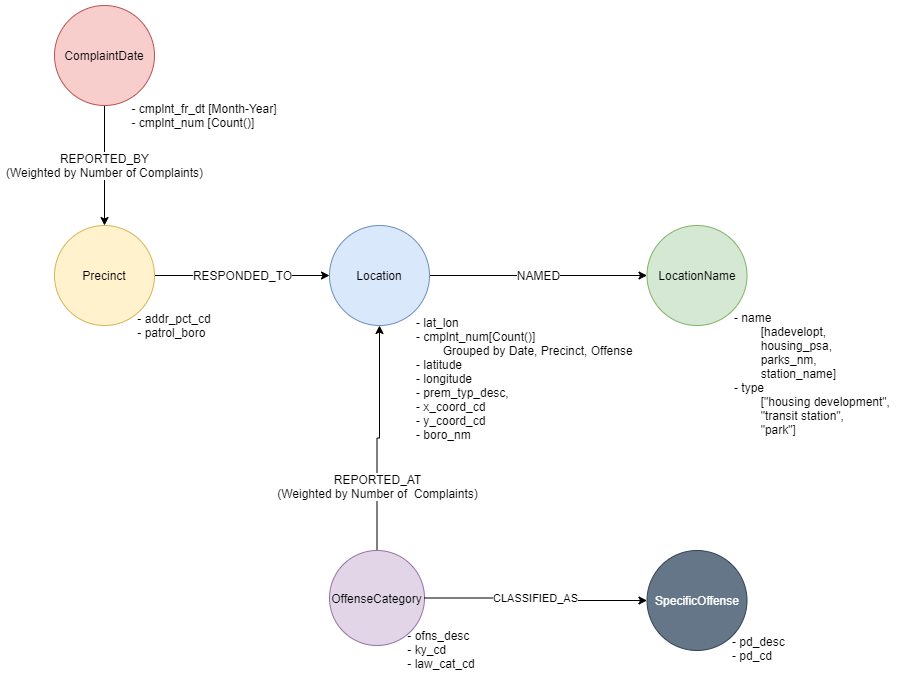

### Neo4J Database Setup

**Data Loading Scripts**

**Database Setup**

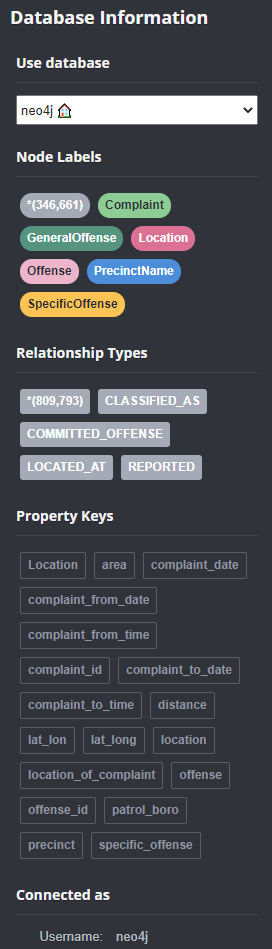

### Cypher Queries

**Precinct Complaints in 2021**

This query captures a high level snapshot of the year to date complaints to see which precincts are dealing with the most complaints.  This information will help when comparing if the hotspots of rising complaints are occurring in the precincts with the most complaints, in the future analysis that is performed at a more granular level when comparing the **Location** nodes.  The data is also normalized to account for the area of each precinct and the number is sorted by the **complaints_per_100k_sqft** field.  One initial finding in the data below shows that 9 out of the top 10 precincts are in Manhattan.


In [9]:
import pandas as pd
pd.read_csv('./exports/precinct_complaints_in_2021.csv').head(10)

,precinct,patrol_boro,number_of_complaints,area,complaints_per_100k_sqft
0,Precinct 14,MAN SOUTH,599,20510163.83,2.920503
1,Precinct 28,MAN NORTH,251,15289544.60,1.641645
2,Precinct 46,BRONX,531,38323373.38,1.385577
3,Precinct 33,MAN NORTH,343,25865037.87,1.326114
4,Precinct 32,MAN NORTH,282,23009990.36,1.225555
5,Precinct 6,MAN SOUTH,264,22098189.76,1.194668
6,Precinct 9,MAN SOUTH,255,21394233.59,1.191910
7,Precinct 18,MAN SOUTH,374,32261097.60,1.159291
8,Precinct 30,MAN NORTH,217,18845037.81,1.151497
9,Precinct 5,MAN SOUTH,193,18088797.95,1.066959


**Top 5 Offenses per Precinct in 2021**

This query gets the top 5 offenses reported by the precincts in 2021.  It is not only important to understand the quantity of offenses but also what those offenses are.  Part of this project is being able to give the NYPD feedback that they can use to make better decisions, and different offenses require different plans of actions.  One pattern found in the example below is that Grand Larceny appears to be a common offense in most precincts.


In [11]:
pd.read_csv('./exports/top_5_offenses_per_precinct.csv').head(25)

,precinct,offense,number_of_complaints,area,complaints_per_100k_sqft
0,Precinct 1,GRAND LARCENY,143,4.731589e+07,0.302224
1,Precinct 1,BURGLARY,27,4.731589e+07,0.057063
2,Precinct 1,FELONY ASSAULT,25,4.731589e+07,0.052836
3,Precinct 1,ROBBERY,21,4.731589e+07,0.044383
4,Precinct 1,CRIMINAL MISCHIEF & RELATED OF,20,4.731589e+07,0.042269
5,Precinct 10,GRAND LARCENY,75,2.726732e+07,0.275055
6,Precinct 10,BURGLARY,35,2.726732e+07,0.128359
7,Precinct 10,CRIMINAL MISCHIEF & RELATED OF,21,2.726732e+07,0.077015
8,Precinct 10,ROBBERY,20,2.726732e+07,0.073348
9,Precinct 10,DANGEROUS WEAPONS,11,2.726732e+07,0.040341


**Difference in complaints between 2019 and 2020**

It is important to understand how complaints have changed over time to determine emerging patterns of offenses.  The dates for this project cover 2019, 2020, and 2021.  Since 2019 and 2020 represent a full years’ worth of data, this query compares the two years number of complaints and calculates the difference to see if complaints have risen, declined or stayed the same for each precinct.  The other part of the use case is understanding how complaints have changed because of the pandemic, years 2019 and 2020 also represent a pre-pandemic and pandemic comparison.


In [24]:
pd.read_csv('./exports/2019_2020_comparison.csv')

,precinct,patrol_boro,years,complaints_per_year,difference_19_20
0,Precinct 43,BRONX,"[2019,2020]","[2286,2654]",368
1,Precinct 104,QUEENS NORTH,"[2019,2020]","[1727,1969]",242
2,Precinct 102,QUEENS SOUTH,"[2019,2020]","[1229,1469]",240
3,Precinct 48,BRONX,"[2019,2020]","[1970,2145]",175
4,Precinct 94,BKLYN NORTH,"[2019,2020]","[1030,1203]",173
5,Precinct 33,MAN NORTH,"[2019,2020]","[1042,1209]",167
6,Precinct 46,BRONX,"[2019,2020]","[2477,2635]",158
7,Precinct 42,BRONX,"[2019,2020]","[1768,1916]",148
8,Precinct 103,QUEENS SOUTH,"[2019,2020]","[2098,2242]",144
9,Precinct 83,BKLYN NORTH,"[2019,2020]","[2018,2141]",123


**Top 5 Locations per Precinct**

This query aims to examine the data at a more granular level; the location of where the complaints are occurring.  It provides some initial insight into potential hotspots of where complaints could be formed and can be used to verify the results of more advanced graph data science algorithms that attempt to group similar nodes into communities.  This query is relevant to the project because a key part is being able to identify areas that will help show precincts where there are a high number of offenses reported.  One idea is to take the JSON output of the location data and integrate it with a web mapping software to show points that are sized proportionally based on the number of complaints.

In [3]:
pd.read_csv('./exports/top_5_locations_per_precinct.csv')

,precinct,location,number_of_complaints
0,Precinct 1,"point({srid:4326, x:-74.00709028, y:40.72025522})",64
1,Precinct 1,"point({srid:4326, x:-74.01060963, y:40.71009385})",56
2,Precinct 1,"point({srid:4326, x:-73.99985714, y:40.72441101})",48
3,Precinct 1,"point({srid:4326, x:-74.01144362, y:40.71461714})",47
4,Precinct 1,"point({srid:4326, x:-74.00165018, y:40.72355738})",41
...,...,...,...
380,Precinct 94,"point({srid:4326, x:-73.95982681, y:40.71588701})",47
381,Precinct 94,"point({srid:4326, x:-73.95311663, y:40.72696507})",44
382,Precinct 94,"point({srid:4326, x:-73.96278968, y:40.720082})",40
383,Precinct 94,"point({srid:4326, x:-73.95380782, y:40.72917213})",29


### Graph Algorithms

**Page Rank of Locations**

The Page Rank centrality algorithm ranks the importance of **Location** nodes based on how many interactions there are with the **Complaint** nodes and assigns a ranking to each location and the results can then be ordered in descending order to show which locations are most central to complaints.  To give the output more meaning and since the **Location** node is spatial, the APOC plugin's reverseGeocode function was used to pass in the latitude and longitude to get an address which is easier to understand.  In the results you will notice that there are some duplicate addresses such as "Macy's 151, West 34th Street...", this is because the number of decimal places in the Location data is greater than the reverse geocoder so similar location points get grouped into the same address.


In [4]:
pd.read_csv('./exports/page_rank_locations.csv')

,address,page_rank
0,"Macy's, 151, West 34th Street, Herald Square, ...",45.6675
1,"New York County State Supreme Court, 111, Cent...",45.4125
2,"Macy's, 151, West 34th Street, Herald Square, ...",36.9975
3,"505, Gateway Drive, Brooklyn, Kings County, Ne...",27.8175
4,"Robert F. Kennedy Bridge, Rivers Edge Road, Ma...",27.6900
5,"Anne Fontaine, Rockefeller Plaza, Midtown, Man...",23.3550
6,"Bloomingdale's, 1000, 3rd Avenue, Upper East S...",20.8050
7,"5th Avenue & East 58th Street, 5th Avenue, Mid...",20.0400
8,"1000, Sutter Avenue, East New York, Brooklyn, ...",18.7650
9,"2, East 169th Street, The Bronx, Bronx County,...",17.8725


**Louvain Complaint Community Detection**

The Louvain community detection algorithm identifies similar complaints and groups them into communities based on the locations they are linked to.  Therefore, communities with a high number of complaints form clusters, and since they are tied to a common location we can identify where these high number of offenses are located.  In the example below for community_id 229376 there are six complaints associated with this community and we can see they are all linked to a common location.  For very large communities it becomes a valuable tool to display a cluster of complaints based on community size and then plot that cluster to the location on a map to help precincts visually see where in their area offenses are happening.


In [5]:
louvain = pd.read_csv('./exports/louvain_complaint_location.csv')

<u>Example</u>

In [6]:
louvain.head(6)

,complaint,community_id
0,187771337,229376
1,932368639,229376
2,428804866,229377
3,219333662,229377
4,626232189,229377
5,992351302,229378


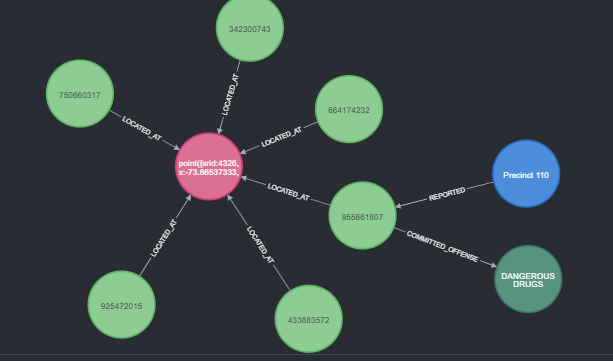

<u>Export</u>

In [7]:
louvain

,complaint,community_id
0,187771337,229376
1,932368639,229376
2,428804866,229377
3,219333662,229377
4,626232189,229377
...,...,...
269803,444394680,346343
269804,102259343,346343
269805,550403928,346343
269806,196345921,346344


**Label Propagation of Offenses**

This algorithm uses Label Propagation to analyze different categories of offenses ranging from general to specific, it is useful to analyze how the offenses are related and how the different node types can be grouped together into communities.  Certain groupings can be offenses that are closely related in meaning such as “Forgery,Etc..” and “Forgery”, but the added value come when the algorithm finds common relationships between two different types of offenses such as “Felony Assault” and “Robbery” and could provide valuable information on patterns of crime and how they are correlated.  The previous two algorithms address the where, in terms of where patterns of high offenses are occurring while this algorithm aims to answer the what, as in what patterns of offenses are occurring.

In [15]:
pd.read_csv('./exports/label_prop_offenses.csv').head(100)

,offense,community_id
0,FORGERY,269839
1,"FORGERY,ETC.,UNCLASSIFIED-FELO",269839
2,ASSAULT POLICE/PEACE OFFICER,269840
3,FELONY ASSAULT,269840
4,ROBBERY,269840
...,...,...
95,"MARIJUANA, POSSESSION 1, 2 & 3",269909
96,AGGRAVATED CRIMINAL CONTEMPT,269910
97,"ROBBERY,LICENSED FOR HIRE VEHICLE",269911
98,"ROBBERY,BICYCLE",269912
